# Lőcsei demográfiai változások 1620-1667 között

In [1]:
import pandas
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from ipydatagrid import DataGrid
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact


records = pandas.read_excel('nevsor.xlsx')

records.head(5)

,lőcsei családok 1600,lőcsei családok 1667
0,Abscheimen,Aaron
1,Abzieher,Abrachamides
2,Audrich,Achband
3,Bank,Adam
4,Bardt,Adami


In [2]:
citizens = pandas.read_excel('szemelyek.xlsx')
citizens.head()

,id,név,születési hely,névváltozat,foglalkozás,életrajzi hivatkozás,rövid leírás,RMNy (alkalmi)
0,1,[szervezet] a besztercebányai evangélikus isko...,NaN,NaN,vizsga,NaN,A tételeket 1642 májusában vitatták meg a besz...,1934
1,2,[szervezet] a lőcsei evangélikus gimnázium elő...,NaN,NaN,program,NaN,Meghívó a lőcsei evangélikus gimnázium hallgat...,2223
2,3,[szervezet] a lőcsei evangélikus gimnázium ünn...,NaN,NaN,program,NaN,A lőcsei evangélikus gimnázium 1666. január 30...,3295
3,4,[szervezet] a lőcsei evangélikus gimnázium viz...,NaN,NaN,vizsga,NaN,A nyomtatvány a lőcsei evangélikus gimnázium 1...,3296
4,5,[szervezet] a lőcsei evangélikus gimnázium viz...,NaN,NaN,vizsga,NaN,1646. szeptember 9. A tételeket szeptember 25-...,2147


Az alábbiakban két külön listába szedem az 1600-as névsort és az 1667-es névsort, majd a listákat metszem a Python beépített halmazkezelő függvényeivel. Ezekből az adatokból, a listák méretét megadva 2-elemű Venn-diagrammot tudunk készíteni a matplotlib-re épülő matplotlib-venn könyvtár segítségével.

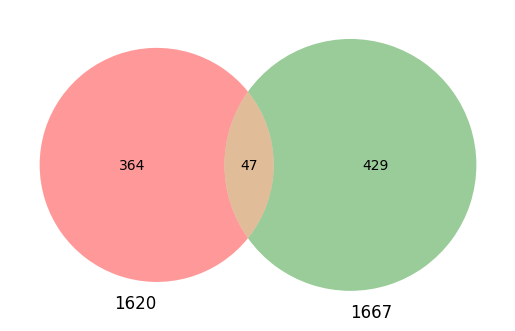

In [3]:
list_1620 = records['lőcsei családok 1600'].dropna().values.tolist()
list_1667 = records['lőcsei családok 1667'].dropna().values.tolist()
list_intersection = list(set(list_1620).intersection(list_1667))


venn2(subsets = (len(list_1620), len(list_1667), len(list_intersection)), set_labels = ('1620', '1667'))
plt.show()

A következőkben egy új adatstruktúrát határozunk meg, amiben az összes lőcse polgári családnév szerepel, majd összevetjük a polgárok névsorával.

In [4]:
def find_in_citizen_records(name):
    index_name = citizens['név'].str.contains(name, na=False)
    index_alt_name = citizens['névváltozat'].str.contains(name, na=False)
    
    index_list = citizens[index_name]
    index_alt_list = citizens[index_alt_name]
    number_of_records =  len(index_list) + len(index_alt_list)
    
    return number_of_records
        
list_of_names = []
for item in list_1620:
    record = {}
    record['name'] = item
    record['records'] = find_in_citizen_records(item)
    record['year'] = '1620'
    list_of_names.append(record)
    
for item in list_intersection:
    record = {}
    record['name'] = item
    record['records'] = find_in_citizen_records(item)
    record['year'] = 'both'
    list_of_names.append(record)
    
for item in list_1667:
    record = {}
    record['name'] = item
    record['records'] = find_in_citizen_records(item)
    record['year'] = '1667'
    list_of_names.append(record)


df = pandas.DataFrame.from_records(list_of_names)
df.head()

,name,records,year
0,Abscheimen,0,1620
1,Abzieher,0,1620
2,Audrich,0,1620
3,Bank,0,1620
4,Bardt,0,1620


A következőben egy megjelenítőt készítünk az így létrejött adatstruktúrának. 

In [6]:
df = df.sort_values(by=['records'], ascending=False)
df = df.style.set_caption("A nyomtatványok között leggyakrabban előforduló családnevek")
df

AttributeError: 'Styler' object has no attribute 'head'